# Exercice 3 page 413

In this problem, you will perform K-means clustering manually, with K=2, on a small example with n=6 observations and p=2 features. The observations are as follows.

(a) Plot the observations

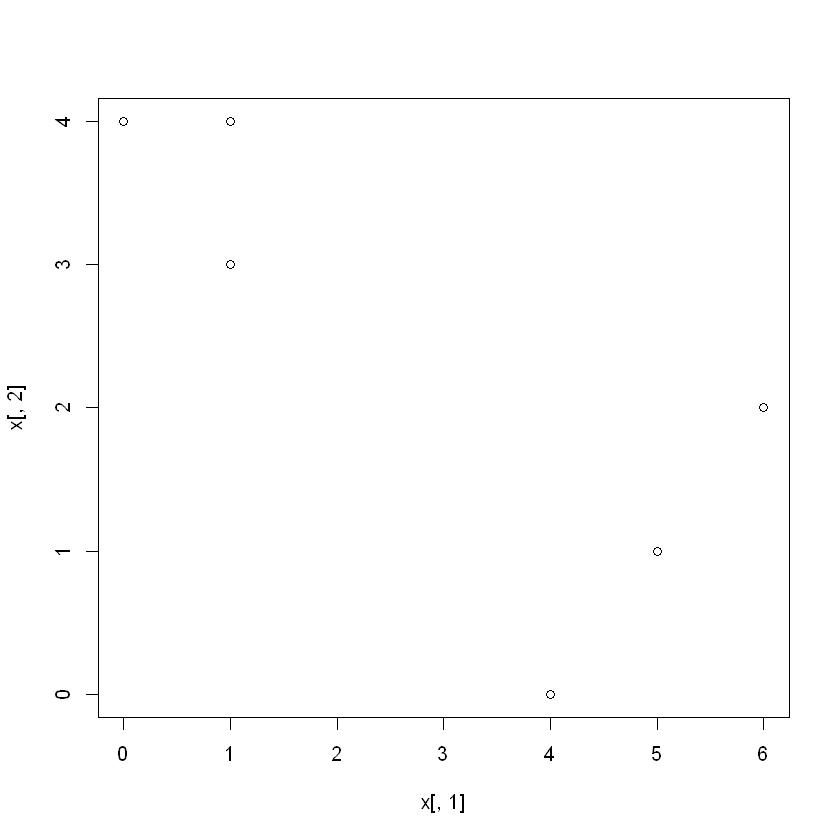

In [10]:
x <- cbind(c(1, 1, 0, 5, 6, 4), c(4, 3, 4, 1, 2, 0))
plot(x[,1], x[,2])

(b) Randomly assign a cluster label to each observation. Report the cluster labels for each observation.

In [22]:
set.seed(2)
labels <- sample(2, nrow(x), replace = T)
labels

[1] 1 1 2 2 2 2

(c) Compute the centroid for each cluster.

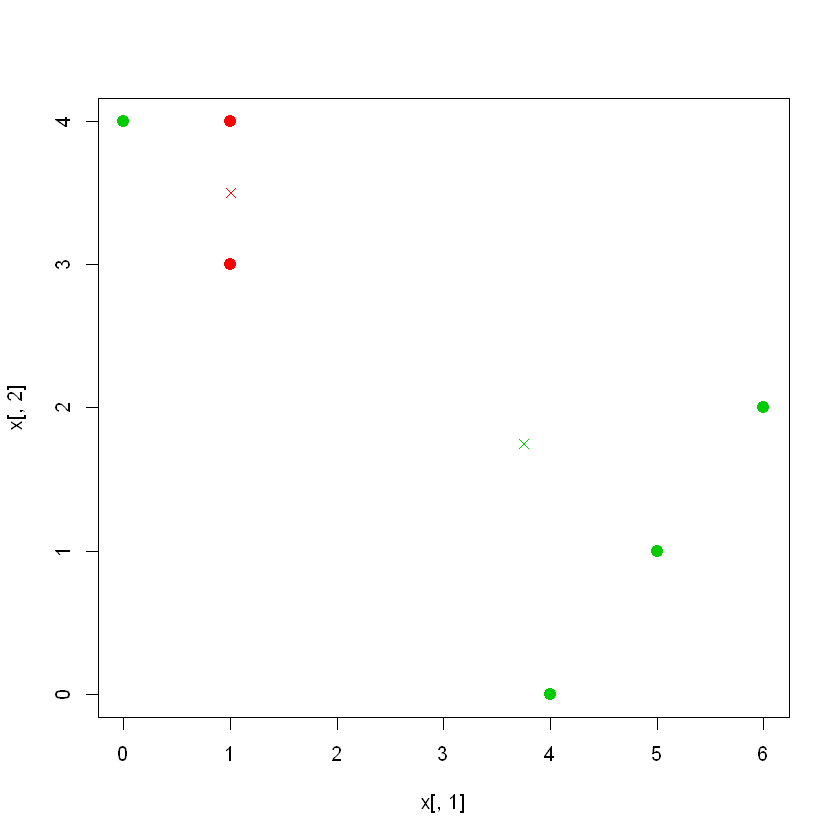

In [23]:
centroid1 <- c(mean(x[labels == 1, 1]), mean(x[labels == 1, 2]))
centroid2 <- c(mean(x[labels == 2, 1]), mean(x[labels == 2, 2]))
plot(x[,1], x[,2], col=(labels + 1), pch = 20, cex = 2)
points(centroid1[1], centroid1[2], col = 2, pch = 4)
points(centroid2[1], centroid2[2], col = 3, pch = 4)

(d) Assign each observation to the centroid to which it is closest, in terms of Euclidean distance. Report the cluster labels for each observation.

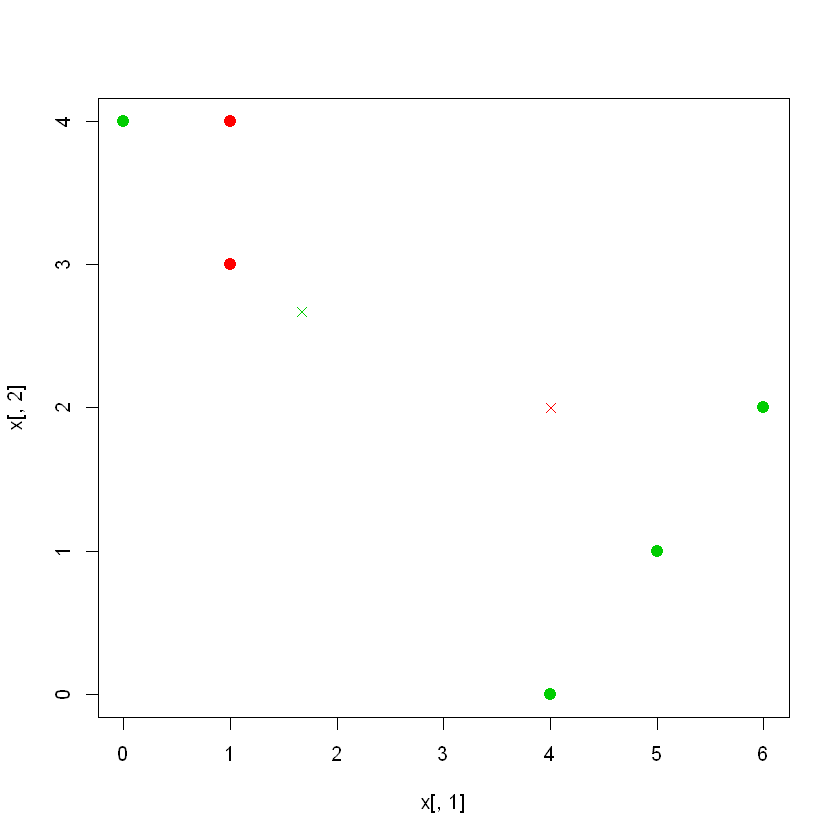

In [26]:
labels <- c(1, 1, 2, 2, 2, 2)
plot(x[, 1], x[, 2], col = (labels + 1), pch = 20, cex = 2)
points(centroid1[1], centroid1[2], col = 2, pch = 4)
points(centroid2[1], centroid2[2], col = 3, pch = 4)

(e) Repeat (c) and (d) until the answers obtained stop changing.

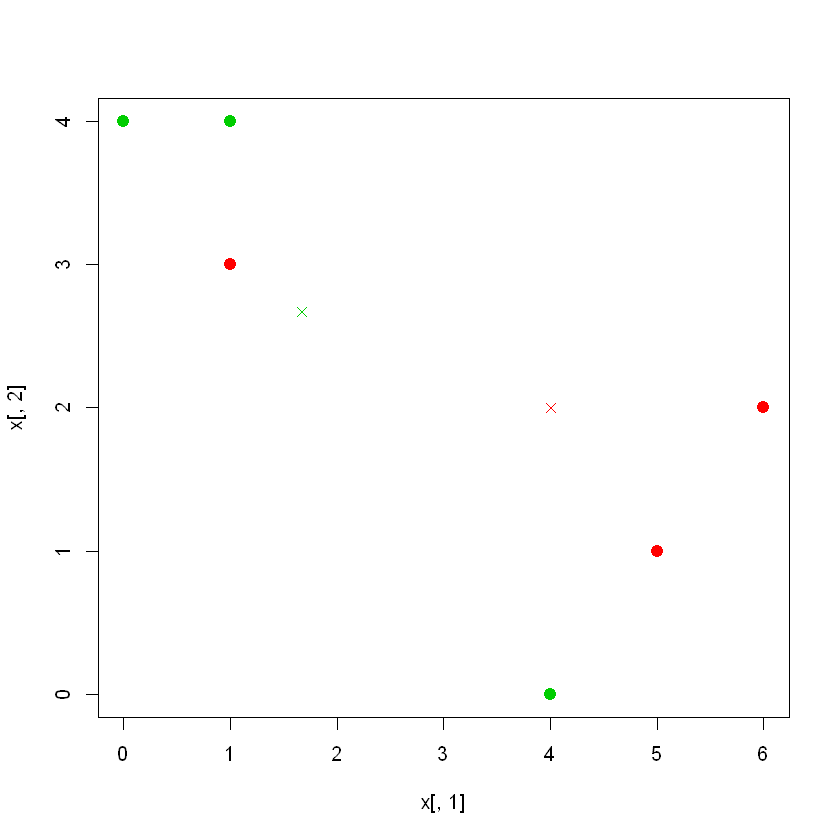

In [25]:
centroid1 <- c(mean(x[labels == 1, 1]), mean(x[labels == 1, 2]))
centroid2 <- c(mean(x[labels == 2, 1]), mean(x[labels == 2, 2]))
plot(x[,1], x[,2], col=(labels + 1), pch = 20, cex = 2)
points(centroid1[1], centroid1[2], col = 2, pch = 4)
points(centroid2[1], centroid2[2], col = 3, pch = 4)

(f) In your plot from (a), color the observations according to the clusters labels obtained.

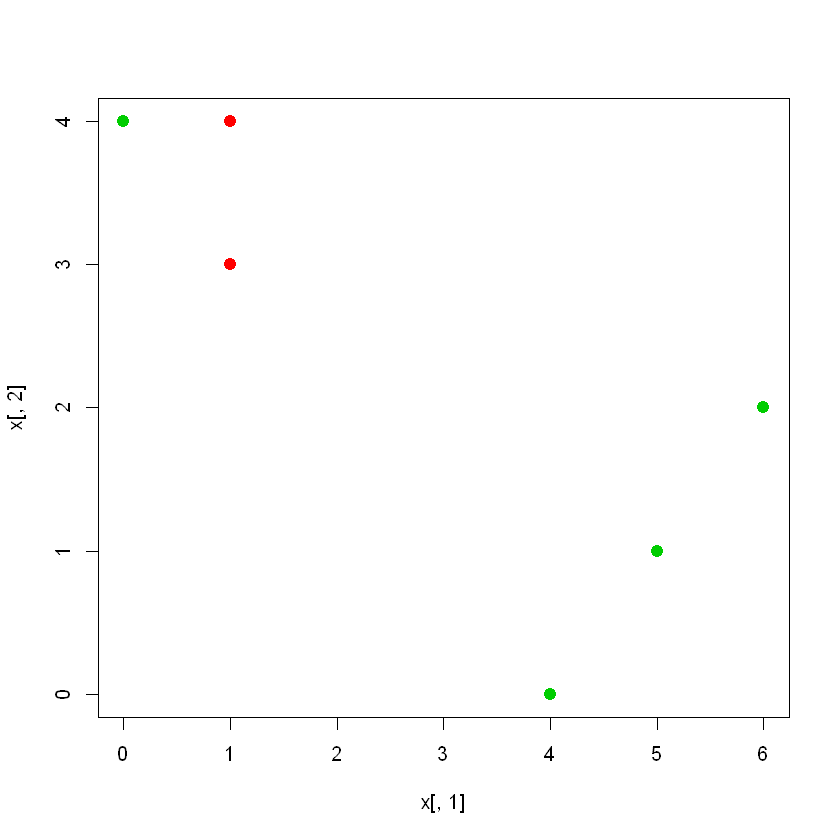

In [27]:
plot(x[, 1], x[, 2], col=(labels + 1), pch = 20, cex = 2)

# Exercice 8 page 416

In Section 10.2.3, a formula for calculating PVE was given in Equation 10.8. We also saw that the PVE can be obtained using the “sdev” output of the “prcomp()” function. On the “USArrests” data, calculate PVE in two ways :

(a) Using the “sdev” output of the “prcomp()” function, as was done in Section 10.2.3.

In [28]:
pr.out <- prcomp(USArrests, scale = TRUE)
pr.var <- pr.out$sdev^2
pve <- pr.var / sum(pr.var)
sum(pr.var)

[1] 4

In [29]:
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

(b) By applying Equation 10.8 directly. That is, use the “prcomp()” function to compute the principal component loadings. Then, use those loadings in Equation 10.8 to obtain the PVE.

In [32]:
loads <- pr.out$rotation
USArrests <- scale(USArrests)
sum2 <- sum(apply(as.matrix(USArrests)^2, 2, sum))
apply((as.matrix(USArrests) %*% loads)^2, 2, sum) / sum2

PC1        PC2        PC3        PC4 
0.62006039 0.24744129 0.08914080 0.04335752

# Exercice 9 page 416

Consider the “USArrests” data. We will now perform hierarchical clustering on the states.

(a) Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

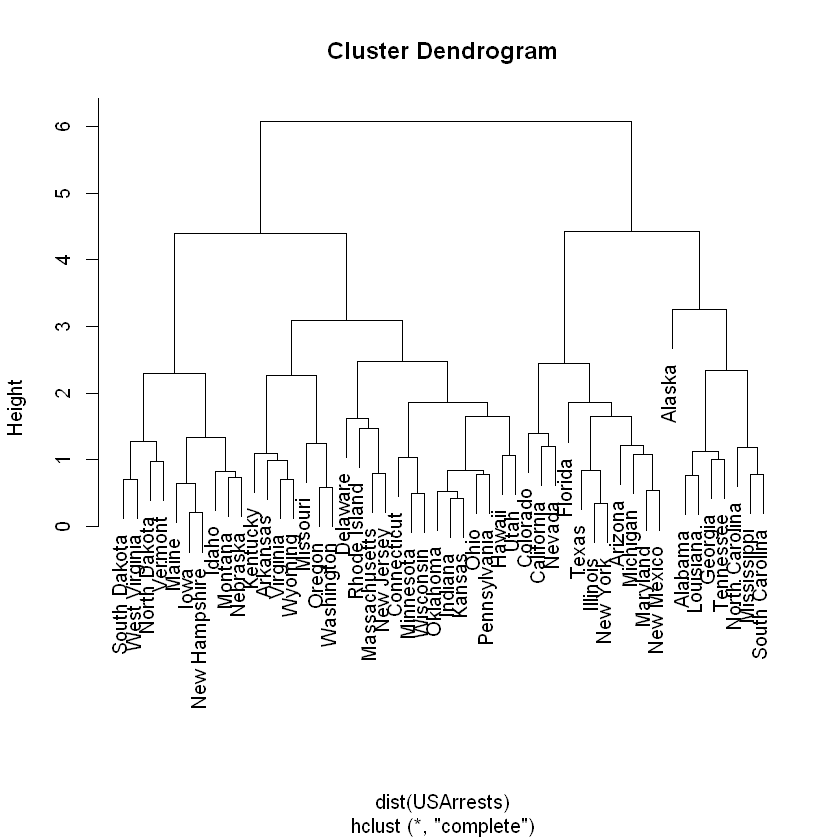

In [42]:
set.seed(21)
hc_completelinkage <- hclust(dist(USArrests), method = "complete")
plot(hc_completelinkage)

(b) Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters ?

In [43]:
cutree(hc_completelinkage, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              2              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              2              3              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              2              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              1              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              3              3              3

(c) Hierachically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.

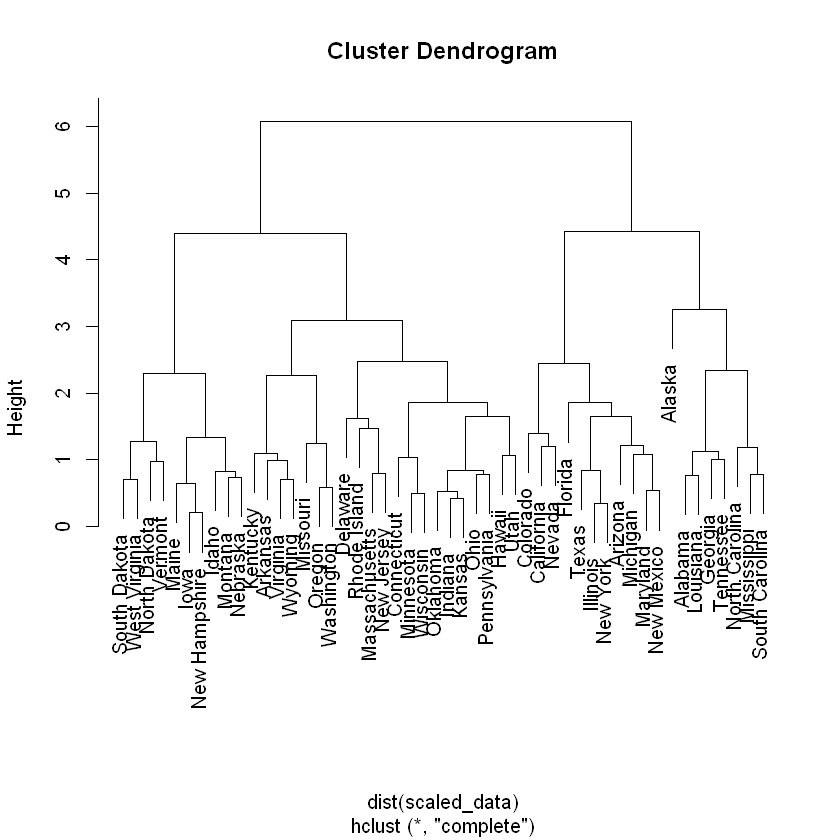

In [44]:
set.seed(21)
scaled_data <- scale(USArrests)
hc_completelinkage2 <- hclust(dist(scaled_data), method = "complete")
plot(hc_completelinkage2)

(d) What effect does scaling the variables have on the hierarchical clustering obtained ? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed ? Provide a justification for your answer.

In [45]:
cutree(hc_completelinkage2, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              2              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              2              3              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              2              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              1              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              3              3              3

In [49]:
table(cutree(hc_completelinkage, 3))


 1  2  3 
 8 11 31 

In [50]:
table(cutree(hc_completelinkage2, 3))


 1  2  3 
 8 11 31 

The trees obtained are similar. The variables should be scales before to avoid any prblem of unstability in case data has different measure units

# Exercice 10 page 417

In this problem, you will generate simulated data, and then perform PCA and K-means clustering on the data.

(a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables

In [103]:
set.seed(21)
data<- matrix(rnorm(20 * 3 * 50, mean = 0, sd = 0.001), ncol = 50)
data[1:20, 2] <- 1
data[21:40, 1] <- 2
data[21:40, 2] <- 2
data[41:60, 1] <- 1
truelabels <- c(rep(1, 20), rep(2, 20), rep(3, 20))

(b) Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, the return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors.

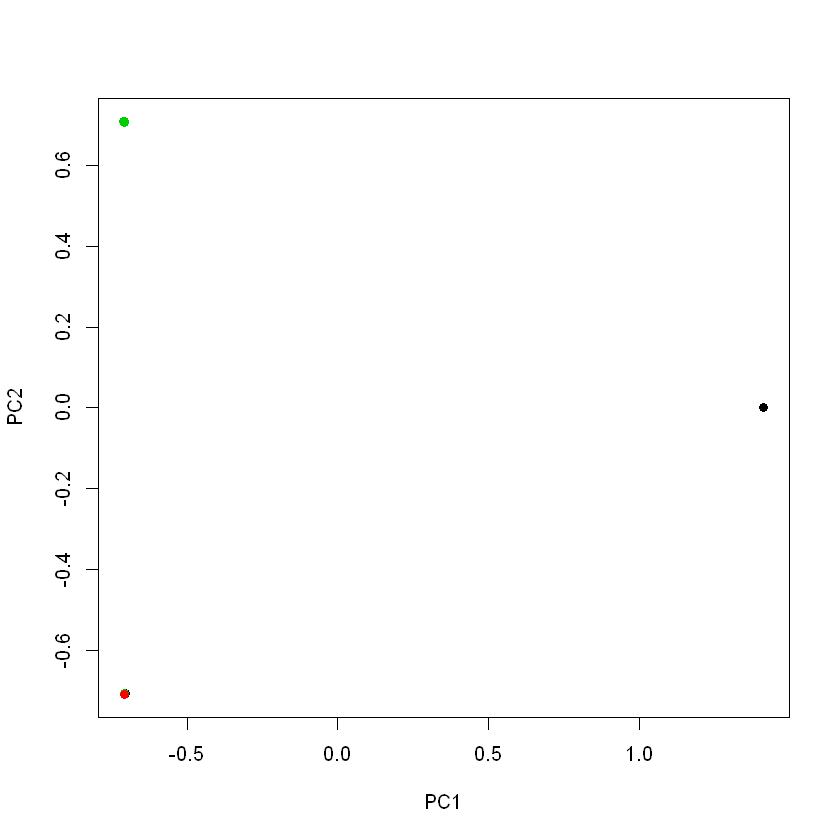

In [98]:
PCA <- prcomp(data)
plot(PCA$x[, 1:2], col = 1:3,  pch = 19)

(c) Perform K-means clustering of the observations with K=3. How well do the clusters that you obtained in K-means clustering compare to the true class labels ?

In [105]:
km <- kmeans(data, 3, nstart = 20)
table(truelabels, km$cluster)

          
truelabels  1  2  3
         1  0  0 20
         2 20  0  0
         3  0 20  0

The observations are not well clustered

(d) Perform K-means clustering with K=2. Describe your result

In [80]:
km2 <- kmeans(x, 2, nstart = 20)
table(truelabels, km2$cluster)

          
truelabels  1  2
         1  0 20
         2 20  0
         3  0 20

(e) Now perform K-means clustering with K=4, and describe your results.

In [108]:
km3 <- kmeans(x, 4, nstart = 20)
table(truelabels, km3$cluster)

          
truelabels  1  2  3  4
         1  0  0  0 20
         2  0  0 20  0
         3  5 15  0  0

(f) Now perform K-means clustering with K=3 on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60x2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

In [110]:
km4 <- kmeans(pr.out$x[, 1:2], 3, nstart = 20)
table(true.labels,km4$cluster)

           
true.labels  1  2  3
          1  0 20  0
          2  0  0 20
          3 20  0  0

(g) Using the “scale()” function, perform K-means clustering with K=3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b) ? Explain.

In [111]:
km4 <- kmeans(scale(x), 3, nstart = 20)
table(truelabels, km4$cluster)

          
truelabels  1  2  3
         1  8 11  1
         2  3  2 15
         3  7 13  0